# PROJET 2 : Analyse des données de systèmes éducatifs

In [1]:
# Import des librairies

In [2]:
import pandas as pd

In [3]:
import seaborn as sb

In [4]:
import numpy as np

In [5]:
from matplotlib import pyplot as plt

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Import des CSV

In [9]:
df_data = pd.read_csv("EdStatsData.csv")

In [10]:
df_Country = pd.read_csv("EdStatsCountry-Series.csv")

In [11]:
df_country = pd.read_csv("EdStatsCountry.csv")

In [12]:
df_FootNote = pd.read_csv("EdStatsFootNote.csv")

In [13]:
df_Series = pd.read_csv("EdStatsSeries.csv")

## 1) Analyse exploratoire des jeux de données

In [14]:
df_FootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


> EdStatsFootNote est un fichier d'information

In [15]:
df_Country.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


> EdStatsCountry-Series est un fichier d'information qui donnent des informations sur les sources des données

In [16]:
df_Series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>EdStatsSeries est un fichier d'information qui donnent des informations sur l'acquisition données 

In [17]:
df_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


> EdStatsCountry est un fichier d'information qui donnent des informations sur l'acquisition données 

In [18]:
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> EdStatsData contient les données et les valeurs des indicateurs par année. C'est avec ce fichier que nous allons faire notre étude.

In [19]:
df_data.shape

(886930, 70)

> notre fichier contient 886930 rows et 70 columns

In [20]:
df_data.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


In [21]:
df_data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country Name,886930,242,Gabon,3665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Code,886930,242,IRL,3665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicator Name,886930,3665,DHS: Gross attendance rate. Post Secondary,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicator Code,886930,3665,PRJ.ATT.4064.1.MA,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,72288,NaN,NaN,NaN,1.97477e+09,1.21169e+11,-1.43556,0.89,6.31772,62.5125,1.90393e+13
...,...,...,...,...,...,...,...,...,...,...,...
2085,51436,NaN,NaN,NaN,717.69,24965.9,-0.78,0.01,0.23,6.08,3.33787e+06
2090,51436,NaN,NaN,NaN,711.307,25301.8,-0.65,0.01,0.23,5.4625,3.35475e+06
2095,51436,NaN,NaN,NaN,703.427,25560.7,-0.55,0.01,0.23,4.68,3.35189e+06
2100,51436,NaN,NaN,NaN,694.03,25741.9,-0.45,0.01,0.22,4.0325,3.33048e+06


La commande describe(include = "all").T nous montre que nous avons:
> 3665 indicateurs, 
> 242 pays et 
> un échantillonnage entre 1970 et 2100

## 2) Sélection des indicateurs

Nous allons choisir les indicateurs par thème.
> Connexion internet

> Education

> Indice de develeppment

> Population

> Population Total (Cet indicateur ne sera pas utilisé pour nos calculs mais comme filtre)

### Connexion internet

In [22]:
df_data.loc[df_data["Indicator Name"].str.contains("Internet")]["Indicator Name"].unique()

array(['Internet users (per 100 people)'], dtype=object)

### Education

In [23]:
df_data.loc[df_data["Indicator Name"].str.contains("enrolment")]["Indicator Name"].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       'Adjusted net enrolment rate, lower secondary, male (%)',
       'Adjusted net enrolment rate, primary, both sexes (%)',
       'Adjusted net enrolment rate, primary, female (%)',
       'Adjusted net enrolment rate, primary, gender parity index (GPI)',
       'Adjusted net enrolment rate, primary, male (%)',
       'Adjusted net enrolment rate, upper secondary, both sexes (%)',
       'Adjusted net enrolment rate, upper secondary, female (%)',
       'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
       'Adjusted net enrolment rate, upper secondary, male (%)',
       'Gross enrolment ratio, lower secondary, both sexes (%)',
       'Gross enrolment ratio, lower secondary, female (%)',
       'Gross enrolment ratio, lower secondary, gen

### Population total

In [24]:
df_data.loc[df_data["Indicator Name"].str.contains("Population, total")]["Indicator Name"]

2533      Population, total
6198      Population, total
9863      Population, total
13528     Population, total
17193     Population, total
                ...        
871138    Population, total
874803    Population, total
878468    Population, total
882133    Population, total
885798    Population, total
Name: Indicator Name, Length: 242, dtype: object

In [25]:
Population_total = df_data.loc[df_data["Indicator Name"].str.contains("Population, total")]["Indicator Name"]

### Population

In [26]:
df_data.loc[df_data["Indicator Name"].str.contains("total")]["Indicator Name"].unique()

array(['All staff compensation as % of total expenditure in lower secondary public institutions (%)',
       'All staff compensation as % of total expenditure in post-secondary non-tertiary public institutions (%)',
       'All staff compensation as % of total expenditure in pre-primary public institutions (%)',
       'All staff compensation as % of total expenditure in primary public institutions (%)',
       'All staff compensation as % of total expenditure in public institutions (%)',
       'All staff compensation as % of total expenditure in secondary public institutions (%)',
       'All staff compensation as % of total expenditure in tertiary public institutions (%)',
       'All staff compensation as % of total expenditure in upper secondary public institutions (%)',
       'Barro-Lee: Average years of primary schooling, age 15+, total',
       'Barro-Lee: Average years of primary schooling, age 15-19, total',
       'Barro-Lee: Average years of primary schooling, age 20-24, t

### Indice de development

In [27]:
df_data.loc[df_data["Indicator Name"].str.contains("GDP")]["Indicator Name"].unique()

array(['GDP at market prices (constant 2005 US$)',
       'GDP at market prices (current US$)',
       'GDP per capita (constant 2005 US$)',
       'GDP per capita (current US$)',
       'GDP per capita, PPP (constant 2011 international $)',
       'GDP per capita, PPP (current international $)',
       'GDP, PPP (constant 2011 international $)',
       'GDP, PPP (current international $)',
       'Government expenditure in educational institutions as % of GDP (%)',
       'Government expenditure in post-secondary non-tertiary institutions as % of GDP (%)',
       'Government expenditure in pre-primary institutions as % of GDP (%)',
       'Government expenditure in primary institutions as % of GDP (%)',
       'Government expenditure in secondary institutions education as % of GDP (%)',
       'Government expenditure in tertiary institutions as % of GDP (%)',
       'Government expenditure on education as % of GDP (%)',
       'Government expenditure on post-secondary non-tertiary edu

In [28]:
### création de ma liste indicator avec mes variables

In [29]:
indicator = ['Internet users (per 100 people)',
             'Adjusted net enrolment rate, upper secondary, both sexes (%)',
             'Gross enrolment ratio, tertiary, both sexes (%)',
             'GDP per capita (current US$)' , 
             'Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)',
             'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary)',
            "Population, total"]

Cette liste va servir: 
> Au nettoyage de mon jeu de donnée

> La création de mes variables 

> Appliquer un filtre pour recaler les pays avec une faible population

In [30]:
df_indicator_int = df_data.loc[df_data["Indicator Name"].isin(indicator)]

In [31]:
df_indicator_int

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
8,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,Arab World,ARB,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.ICMP.2024.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,Arab World,ARB,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.ICMP.2024.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1245,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,2.504886e+02,2.832480e+02,3.286929e+02,4.068046e+02,7.585630e+02,8.173936e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1339,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,5.897290e+00,5.890620e+00,6.169500e+00,6.531240e+00,6.933240e+00,7.477840e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883659,Zimbabwe,ZWE,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.ICMP.2024.ZS,4.720000e+00,NaN,NaN,NaN,NaN,4.720000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884510,Zimbabwe,ZWE,GDP per capita (current US$),NY.GDP.PCAP.CD,3.640544e+02,4.071457e+02,4.837049e+02,5.778467e+02,6.725553e+02,7.148056e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884604,Zimbabwe,ZWE,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,1.718440e+00,1.668860e+00,1.673130e+00,1.548440e+00,1.584170e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3) Nettoyage des données

In [32]:
# création de décenie pour l'identification de la période d'étude 

In [33]:
df_indicator_int['1970s'] = df_indicator_int[[str(year) for year in range(1970,1980,1)]].mean(1)
df_indicator_int['1980s'] = df_indicator_int[[str(year) for year in range(1980,1990,1)]].mean(1)
df_indicator_int['1990s'] = df_indicator_int[[str(year) for year in range(1990,2000,1)]].mean(1)
df_indicator_int['2000s'] = df_indicator_int[[str(year) for year in range(2000,2010,1)]].mean(1)
df_indicator_int['2010s'] = df_indicator_int[[str(year) for year in [2010,2011,2012,2013,2014,2015,2016,2017]]].mean(1)
df_indicator_int['2020s'] = df_indicator_int[[str(year) for year in [2020,2025]]].mean(1)
df_indicator_int['2030s'] = df_indicator_int[[str(year) for year in [2030,2035]]].mean(1)
df_indicator_int['2040s'] = df_indicator_int[[str(year) for year in [2040,2045]]].mean(1)
df_indicator_int['2050s'] = df_indicator_int[[str(year) for year in [2050,2055]]].mean(1)
df_indicator_int['2060s'] = df_indicator_int[[str(year) for year in [2060,2065]]].mean(1)
df_indicator_int['2070s'] = df_indicator_int[[str(year) for year in [2070,2075]]].mean(1)
df_indicator_int['2080s'] = df_indicator_int[[str(year) for year in [2080,2085]]].mean(1)
df_indicator_int['2090s'] = df_indicator_int[[str(year) for year in [2090,2095]]].mean(1)
df_indicator_int['2100s'] = df_indicator_int[[str(2100)]].mean(1)

<ipython-input-33-f9b25149558b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indicator_int['1970s'] = df_indicator_int[[str(year) for year in range(1970,1980,1)]].mean(1)
<ipython-input-33-f9b25149558b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indicator_int['1980s'] = df_indicator_int[[str(year) for year in range(1980,1990,1)]].mean(1)
<ipython-input-33-f9b25149558b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [34]:
df_indicator_int[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].values

array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       ...,
       [1.57172223e+00, 2.24788499e+00, 5.33896001e+00, ...,
                   nan,            nan,            nan],
       [           nan,            nan, 4.32310907e-02, ...,
                   nan,            nan,            nan],
       [6.02612090e+06, 8.51225950e+06, 1.11838142e+07, ...,
                   nan,            nan,            nan]])

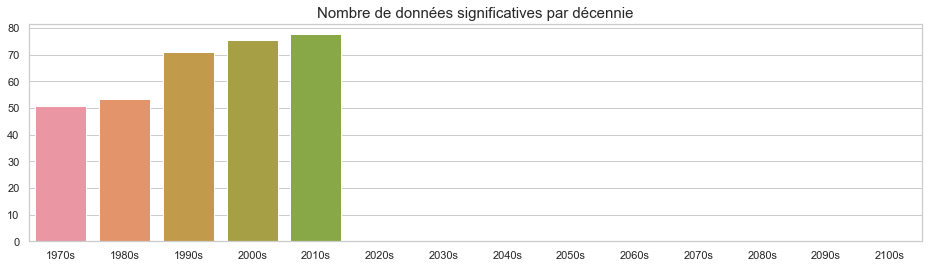

In [35]:
sb.set(style="whitegrid")
plt.figure(figsize=(16, 4))
plt.title('Nombre de données significatives par décennie', size=15)
plot = sb.barplot(y = (df_indicator_int.shape[0] - df_indicator_int[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].isna().sum().values)/df_indicator_int.shape[0]*100, x = df_indicator_int[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].isna().sum().index)
plt.show()

> L'histogramme Nombre de données significatives par décennie nous permet d'identifier les périodes sans données (2020s - 2100s) et des périodes avec des données (1970s - 2010s).

> Pour le choix de notre période d'étude, nous prendrons les périodes ou les données sont supérieures à 70% ce qui correspond aux décenies 2000s et 2010s (2000 à 2020)

In [36]:
df_indicator_int.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69', '1970s', '1980s', '1990s', '2000s',
       '2010s', '2020s', '2030s', '2040s', '2050s', '2060s', '2070s', '2080s',
       '2090s', '2100s'],
      dtype='object')

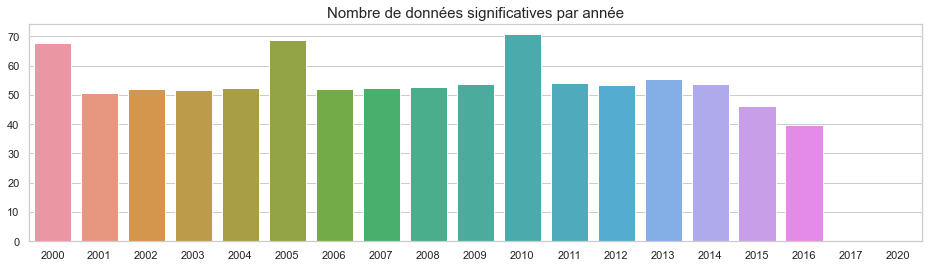

In [37]:
sb.set(style="whitegrid")
plt.figure(figsize=(16, 4))
plt.title('Nombre de données significatives par année', size=15)
plot = sb.barplot(y = (df_indicator_int.shape[0] - df_indicator_int[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014','2015', '2016', '2017', '2020']].isna().sum().values)/df_indicator_int.shape[0]*100, x = df_indicator_int[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014','2015', '2016', '2017', '2020']].isna().sum().index)
plt.show()

> L'histogramme Nombre de données par année permet de reduire notre période d'étude (2000 - 2016).

> Notre dataframe comprendra les données de 2000 à 2014 car ce sont ls zones ou nous avons le plus données au dela de la moyennes.

> Notre dataframe de base sera appélé df_indicator_base 

In [38]:
# création de ma dataframe de base 

In [39]:
df_indicator_base = df_indicator_int[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014']]

In [40]:
df_indicator_base

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
8,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,Arab World,ARB,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.ICMP.2024.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,Arab World,ARB,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.ICMP.2024.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1245,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,2.615683e+03,2.515078e+03,2.499335e+03,2.754305e+03,3.168186e+03,3.796022e+03,4.414093e+03,5.046817e+03,6.255761e+03,5.267553e+03,6.032962e+03,7.005480e+03,7.571402e+03,7.715999e+03,NaN
1339,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,1.816090e+01,1.876543e+01,1.956947e+01,1.955899e+01,2.069919e+01,2.173148e+01,2.219148e+01,2.273654e+01,2.343787e+01,2.409880e+01,2.476180e+01,2.427387e+01,2.577601e+01,2.733034e+01,2.817496e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883659,Zimbabwe,ZWE,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.ICMP.2024.ZS,4.800000e-01,NaN,NaN,NaN,NaN,4.800000e-01,NaN,NaN,NaN,NaN,4.700000e-01,NaN,NaN,NaN,NaN
884510,Zimbabwe,ZWE,GDP per capita (current US$),NY.GDP.PCAP.CD,5.473589e+02,5.480587e+02,5.073480e+02,4.533512e+02,4.543607e+02,4.447605e+02,4.147962e+02,3.969982e+02,3.256786e+02,6.242722e+02,7.199795e+02,8.409499e+02,9.681639e+02,1.026388e+03,1.031105e+03
884604,Zimbabwe,ZWE,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.905600e+00,5.823760e+00,5.868670e+00,5.871750e+00,NaN
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,4.014335e-01,7.998460e-01,1.100000e+00,1.800000e+00,2.100000e+00,2.400000e+00,2.400000e+00,3.000000e+00,3.500000e+00,4.000000e+00,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01


In [41]:
df_indicator_base_melt = df_indicator_base.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], value_vars = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014'], var_name = 'Year', value_name = 'Value')

In [42]:
df_indicator_base_melt.head(20)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,2000,NaN
1,Arab World,ARB,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.ICMP.2024.ZS,2000,NaN
2,Arab World,ARB,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.ICMP.2024.ZS,2000,NaN
3,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,2000,2.615683e+03
4,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,2000,1.816090e+01
5,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,2000,1.139541e+00
6,Arab World,ARB,"Population, total",SP.POP.TOTL,2000,2.775614e+08
7,East Asia & Pacific,EAS,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,2000,NaN
8,East Asia & Pacific,EAS,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.ICMP.2024.ZS,2000,NaN
9,East Asia & Pacific,EAS,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.ICMP.2024.ZS,2000,NaN


In [43]:
# transformer 

In [44]:
df_indicator_pivot = df_indicator_base_melt.pivot_table(index=['Country Name', 'Country Code', 'Year'], 
                    columns='Indicator Name', 
                   values='Value').reset_index()

In [45]:
df_indicator_pivot.head(5)

Indicator Name,Country Name,Country Code,Year,"Adjusted net enrolment rate, upper secondary, both sexes (%)",Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary),Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary),GDP per capita (current US$),"Gross enrolment ratio, tertiary, both sexes (%)",Internet users (per 100 people),"Population, total"
0,Afghanistan,AFG,2000,NaN,17.69,9.04,NaN,NaN,NaN,20093756.0
1,Afghanistan,AFG,2001,NaN,NaN,NaN,117.409691,NaN,0.004723,20966463.0
2,Afghanistan,AFG,2002,NaN,NaN,NaN,187.845095,NaN,0.004561,21979923.0
3,Afghanistan,AFG,2003,NaN,NaN,NaN,198.728544,1.25684,0.087891,23064851.0
4,Afghanistan,AFG,2004,NaN,NaN,NaN,219.141353,1.25603,0.105809,24118979.0


In [46]:
df_indicator_pivot_clean = df_indicator_pivot.fillna(0)

In [47]:
df_indicator_pivot_clean

Indicator Name,Country Name,Country Code,Year,"Adjusted net enrolment rate, upper secondary, both sexes (%)",Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary),Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary),GDP per capita (current US$),"Gross enrolment ratio, tertiary, both sexes (%)",Internet users (per 100 people),"Population, total"
0,Afghanistan,AFG,2000,0.000000,17.69,9.04,0.000000,0.00000,0.000000,20093756.0
1,Afghanistan,AFG,2001,0.000000,0.00,0.00,117.409691,0.00000,0.004723,20966463.0
2,Afghanistan,AFG,2002,0.000000,0.00,0.00,187.845095,0.00000,0.004561,21979923.0
3,Afghanistan,AFG,2003,0.000000,0.00,0.00,198.728544,1.25684,0.087891,23064851.0
4,Afghanistan,AFG,2004,0.000000,0.00,0.00,219.141353,1.25603,0.105809,24118979.0
...,...,...,...,...,...,...,...,...,...,...
3596,Zimbabwe,ZWE,2010,0.000000,59.93,0.47,719.979517,5.90560,6.400000,14086317.0
3597,Zimbabwe,ZWE,2011,0.000000,0.00,0.00,840.949880,5.82376,8.400000,14386649.0
3598,Zimbabwe,ZWE,2012,0.000000,0.00,0.00,968.163871,5.86867,12.000000,14710826.0
3599,Zimbabwe,ZWE,2013,32.071152,0.00,0.00,1026.388289,5.87175,15.500000,15054506.0


In [48]:
### filtre pour ne garder que les pays

In [49]:
Country_world = df_indicator_pivot_clean['Country Name'].unique()

In [50]:
Country_world = ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia',
       'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Gibraltar',
       'Greece', 'Greenland', 'Grenada', 'Guam', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Ireland',
       'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kiribati', 'Korea, Dem. People’s Rep.',
       'Korea, Rep.', 'Kosovo', 'Kuwait', 'Kyrgyz Republic', 'Lao PDR', 'Latvia','Lebanon',
       'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Macao SAR, China', 'Macedonia, FYR', 'Madagascar',
       'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
       'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico',
       'Micronesia, Fed. Sts.', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro',
       'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal',
       'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua',
       'Niger', 'Nigeria', 'Northern Mariana Islands',
       'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama',
       'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Puerto Rico', 'Qatar', 'Romania',
       'Russian Federation', 'Rwanda', 'Samoa', 'San Marino',
       'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Seychelles', 'Sierra Leone', 'Singapore',
       'Sint Maarten (Dutch part)', 'Slovak Republic', 'Slovenia',
       'Solomon Islands', 'Somalia', 'South Africa',
       'South Sudan', 'Spain', 'Sri Lanka', 'St. Kitts and Nevis',
       'St. Lucia', 'St. Martin (French part)',
       'St. Vincent and the Grenadines', 'Sudan', 'Suriname',
       'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic',
       'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo',
       'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
       'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda',
       'Ukraine', 'United Kingdom',
       'United States', 'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Venezuela, RB', 'Vietnam', 'Virgin Islands (U.S.)',
       'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']

In [51]:
df_indicator_pivot_clean = df_indicator_pivot_clean.loc[df_indicator_pivot_clean['Country Name'].isin(Country_world)]
# creer un dataframe avec tous les pays que je veux et ensuite je fais le isin dans ce dataframe la pour ne garder que les pays qe je veux
# remplacer ['woarld'] par e nom du dataframe

In [52]:
df_indicator_pivot_clean.head(5)

Indicator Name,Country Name,Country Code,Year,"Adjusted net enrolment rate, upper secondary, both sexes (%)",Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary),Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary),GDP per capita (current US$),"Gross enrolment ratio, tertiary, both sexes (%)",Internet users (per 100 people),"Population, total"
0,Afghanistan,AFG,2000,0.0,17.69,9.04,0.000000,0.00000,0.000000,20093756.0
1,Afghanistan,AFG,2001,0.0,0.00,0.00,117.409691,0.00000,0.004723,20966463.0
2,Afghanistan,AFG,2002,0.0,0.00,0.00,187.845095,0.00000,0.004561,21979923.0
3,Afghanistan,AFG,2003,0.0,0.00,0.00,198.728544,1.25684,0.087891,23064851.0
4,Afghanistan,AFG,2004,0.0,0.00,0.00,219.141353,1.25603,0.105809,24118979.0


## 4) Interprétation des données

In [53]:
# Indicateur Connexion internet

In [54]:
internet_users = df_indicator_pivot_clean.groupby('Country Name')['Internet users (per 100 people)'].agg('max').reset_index()
internet_users.columns =['Country Name', 'Internet users (per 100 people)']
internet_users = internet_users.sort_values('Internet users (per 100 people)', ascending= False)

In [55]:
internet_users

,Country Name,Internet users (per 100 people)
86,Iceland,98.16
20,Bermuda,96.80
145,Norway,96.30
52,Denmark,95.99
4,Andorra,95.90
...,...,...
92,Isle of Man,0.00
101,"Korea, Dem. People’s Rep.",0.00
103,Kosovo,0.00
181,St. Martin (French part),0.00


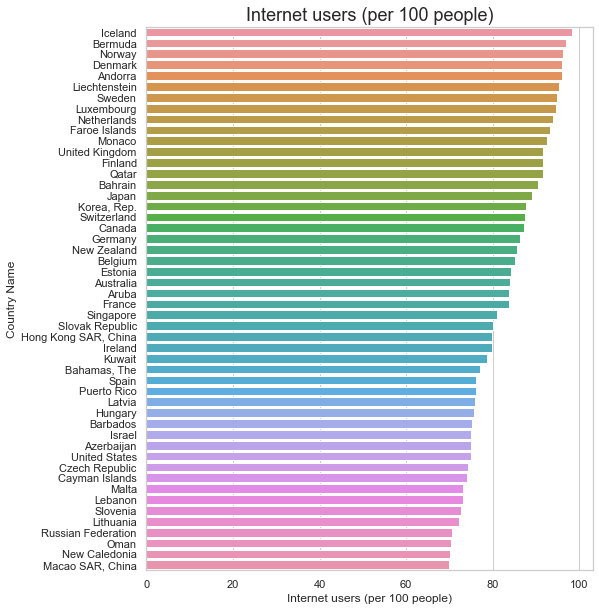

In [56]:
sb.set(style="whitegrid")
plt.figure(figsize=(8, 10))
plt.title('Internet users (per 100 people)', size=18)
plot = sb.barplot(y = internet_users.iloc[:50]['Country Name'], 
                   x = internet_users.iloc[:50]['Internet users (per 100 people)'])

> Le graphique montre que les pays suivants sont ceux ayant les meuilleurs connexions internet 

> par ordre de priorité : 

> Iceland, Bermudes, la norvège, le denmarke, l'andorre et le leichtenstein

In [57]:
# Development GDP per capita (current US$)

In [58]:
GDP_per_capita = df_indicator_pivot_clean.groupby('Country Name')['GDP per capita (current US$)'].agg('max').reset_index()
GDP_per_capita.columns =['Country Name', 'GDP per capita (current US$)']
GDP_per_capita = GDP_per_capita.sort_values('GDP per capita (current US$)', ascending= False)

In [59]:
GDP_per_capita

,Country Name,GDP per capita (current US$)
129,Monaco,192989.189527
112,Liechtenstein,179308.075616
114,Luxembourg,119225.380023
145,Norway,103059.248228
115,"Macao SAR, China",94004.389829
...,...,...
199,Turks and Caicos Islands,0.000000
136,Nauru,0.000000
181,St. Martin (French part),0.000000
26,British Virgin Islands,0.000000


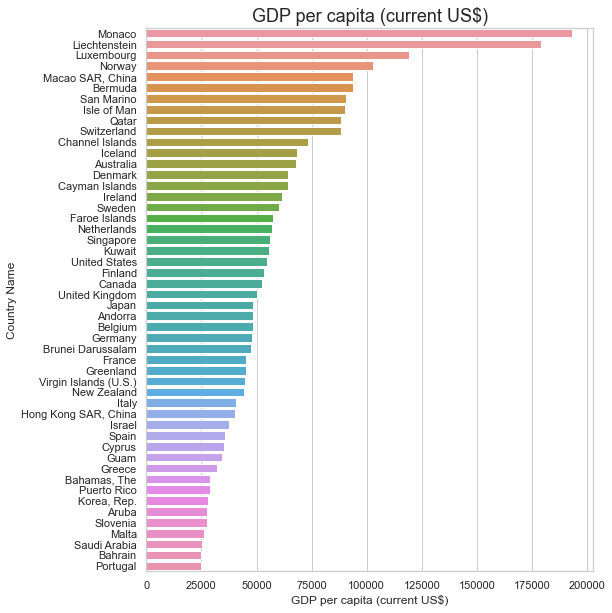

In [60]:
sb.set(style="whitegrid")
plt.figure(figsize=(8, 10))
plt.title('GDP per capita (current US$)', size=18)
plot = sb.barplot(y = GDP_per_capita.iloc[:50]['Country Name'], 
                   x = GDP_per_capita.iloc[:50]['GDP per capita (current US$)'])
plt.show()

> Le graphique montre que les pays suivants sont ceux ayant les PIB par habitants: 

> Les cinq premier sont Monaco, leichtenstein, Luxembourg, Norway et Macao SAR.

In [61]:
# Indicateurs education

In [62]:
# 'Gross enrolment ratio, tertiary, both sexes (%)'

In [63]:
education_tertiary = df_indicator_pivot_clean.groupby('Country Name')['Gross enrolment ratio, tertiary, both sexes (%)'].agg('max').reset_index()
education_tertiary.columns =['Country Name', 'Gross enrolment ratio, tertiary, both sexes (%)']
education_tertiary = education_tertiary.sort_values('Gross enrolment ratio, tertiary, both sexes (%)', ascending= False)

In [64]:
education_tertiary

,Country Name,"Gross enrolment ratio, tertiary, both sexes (%)"
48,Cuba,119.778748
74,Greece,113.871788
102,"Korea, Rep.",99.660339
204,United States,96.322403
65,Finland,95.601837
...,...,...
181,St. Martin (French part),0.000000
182,St. Vincent and the Grenadines,0.000000
75,Greenland,0.000000
146,Oman,0.000000


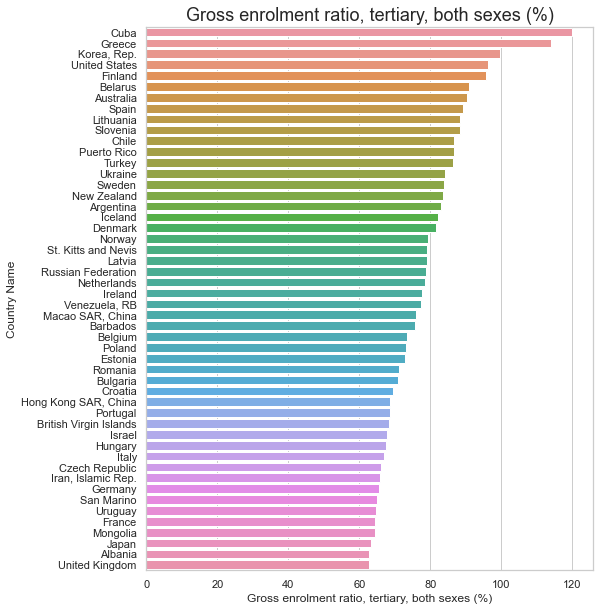

In [65]:
sb.set(style="whitegrid")
plt.figure(figsize=(8, 10))
plt.title('Gross enrolment ratio, tertiary, both sexes (%)', size=18)
plot = sb.barplot(y = education_tertiary.iloc[:50]['Country Name'], 
                   x = education_tertiary.iloc[:50]['Gross enrolment ratio, tertiary, both sexes (%)'])
plt.show()

> Le graphique montre que Cuba sans suprise est le pays avec le plus haut taux d'alphabétisation au monde.

> sources https://fr.wikipedia.org/wiki/Liste_des_pays_par_taux_d%27alphab%C3%A9tisation

In [66]:
# 'Adjusted net enrolment rate, upper secondary, both sexes (%)'

In [67]:
education_upsecondary = df_indicator_pivot_clean.groupby('Country Name')['Adjusted net enrolment rate, upper secondary, both sexes (%)'].agg('max').reset_index()
education_upsecondary.columns =['Country Name', 'Adjusted net enrolment rate, upper secondary, both sexes (%)']
education_upsecondary = education_upsecondary.sort_values('Adjusted net enrolment rate, upper secondary, both sexes (%)', ascending= False)

In [68]:
education_upsecondary

,Country Name,"Adjusted net enrolment rate, upper secondary, both sexes (%)"
101,"Korea, Dem. People’s Rep.",98.438393
96,Japan,97.071823
98,Kazakhstan,94.926010
172,Slovenia,94.359444
203,United Kingdom,92.257690
...,...,...
174,Somalia,0.000000
43,"Congo, Dem. Rep.",0.000000
176,South Sudan,0.000000
77,Guam,0.000000


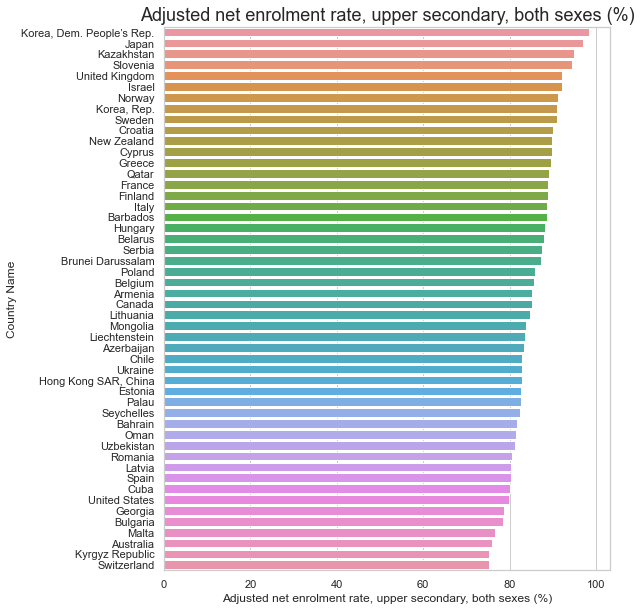

In [69]:
sb.set(style="whitegrid")
plt.figure(figsize=(8, 10))
plt.title('Adjusted net enrolment rate, upper secondary, both sexes (%)', size=18)
plot = sb.barplot(y = education_upsecondary.iloc[:50]['Country Name'], 
                   x = education_upsecondary.iloc[:50]['Adjusted net enrolment rate, upper secondary, both sexes (%)'])
plt.show()

> Le graphique montre que la corée du Nord est le pays avec le plus grand pourcentage de personnes ayant fait des études secondaires.

In [70]:
# Indicateur population

In [71]:
# 'Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)'

In [72]:
pop2024_itertiary = df_indicator_pivot_clean.groupby('Country Name')['Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)'].agg('max').reset_index()
pop2024_itertiary.columns =['Country Name', 'Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)']
pop2024_itertiary = pop2024_itertiary.sort_values('Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)', ascending= False)

In [73]:
pop2024_itertiary 

,Country Name,Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)
86,Iceland,86.15
102,"Korea, Rep.",84.98
48,Cuba,75.78
159,Russian Federation,71.46
140,New Zealand,69.79
...,...,...
53,Djibouti,0.00
139,New Caledonia,0.00
54,Dominica,0.00
136,Nauru,0.00


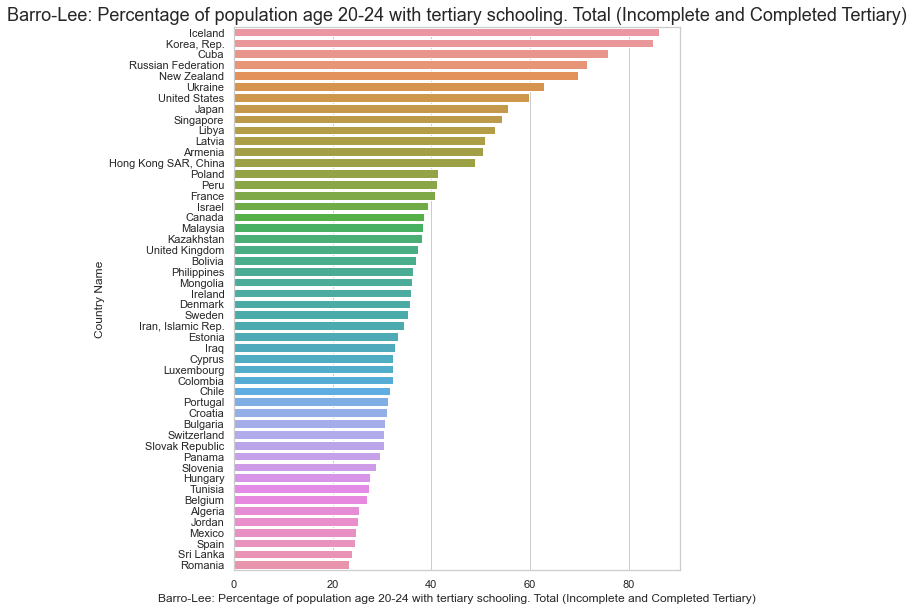

In [74]:
sb.set(style="whitegrid")
plt.figure(figsize=(8, 10))
plt.title('Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)', size=18)
plot = sb.barplot(y = pop2024_itertiary .iloc[:50]['Country Name'], 
                   x = pop2024_itertiary .iloc[:50]['Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)'])
plt.show()

In [75]:
# 'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary)'

In [76]:
pop2024_isecondary = df_indicator_pivot_clean.groupby('Country Name')['Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary)'].agg('max').reset_index()
pop2024_isecondary.columns =['Country Name', 'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary)']
pop2024_isecondary = pop2024_isecondary.sort_values('Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary)', ascending= False)

In [77]:
pop2024_isecondary

,Country Name,Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary)
24,Botswana,96.86
10,Australia,96.50
172,Slovenia,96.40
51,Czech Republic,95.51
15,Barbados,94.96
...,...,...
162,San Marino,0.00
161,Samoa,0.00
103,Kosovo,0.00
21,Bhutan,0.00


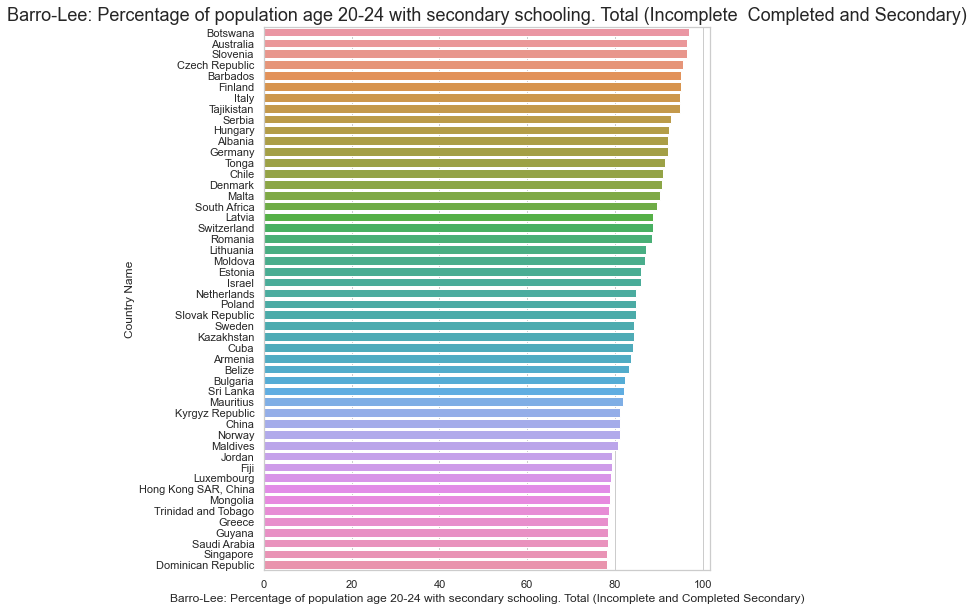

In [78]:
sb.set(style="whitegrid")
plt.figure(figsize=(8, 10))
plt.title('Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete  Completed and Secondary)', size=18)
plot = sb.barplot(y = pop2024_isecondary.iloc[:50]['Country Name'], 
                   x = pop2024_isecondary.iloc[:50]['Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary)'])
plt.show()

> Pour notre indicateur population, nous avons considéré les intervalles d'âges 20-24 ans car ce sont les âges qui moyennes ou pendant lesquelles nous faisons nos études.

> Selon l'OCDE, l'âge moyen d'obtention d'un diplôme universitaire en Europe est de 22 ans.

> Sources : https://www.oecd.org/education/skills-beyond-school/EDIF%202014--No%2023%20(FR).pdf

In [79]:
### filtre des pays avec paur population total
### les pays avec des popoluations inférieures à 2 millions d'habitants ne seront pas pris.
### sources : https://fr.vikidia.org/wiki/Liste_des_pays_par_population

In [80]:
df_indicator_pivot_red = df_indicator_pivot_clean.loc[df_indicator_pivot['Population, total'] > 2000000.0]

In [81]:
df_indicator_pivot_red

Indicator Name,Country Name,Country Code,Year,"Adjusted net enrolment rate, upper secondary, both sexes (%)",Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary),Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary),GDP per capita (current US$),"Gross enrolment ratio, tertiary, both sexes (%)",Internet users (per 100 people),"Population, total"
0,Afghanistan,AFG,2000,0.000000,17.69,9.04,0.000000,0.00000,0.000000,20093756.0
1,Afghanistan,AFG,2001,0.000000,0.00,0.00,117.409691,0.00000,0.004723,20966463.0
2,Afghanistan,AFG,2002,0.000000,0.00,0.00,187.845095,0.00000,0.004561,21979923.0
3,Afghanistan,AFG,2003,0.000000,0.00,0.00,198.728544,1.25684,0.087891,23064851.0
4,Afghanistan,AFG,2004,0.000000,0.00,0.00,219.141353,1.25603,0.105809,24118979.0
...,...,...,...,...,...,...,...,...,...,...
3596,Zimbabwe,ZWE,2010,0.000000,59.93,0.47,719.979517,5.90560,6.400000,14086317.0
3597,Zimbabwe,ZWE,2011,0.000000,0.00,0.00,840.949880,5.82376,8.400000,14386649.0
3598,Zimbabwe,ZWE,2012,0.000000,0.00,0.00,968.163871,5.86867,12.000000,14710826.0
3599,Zimbabwe,ZWE,2013,32.071152,0.00,0.00,1026.388289,5.87175,15.500000,15054506.0


## 5) Réponses aux questions

In [82]:
# uniformisation des indicateurs

In [83]:
indicator_uni = ['Internet users (per 100 people)',
             'Adjusted net enrolment rate, upper secondary, both sexes (%)',
             'Gross enrolment ratio, tertiary, both sexes (%)',
             'GDP per capita (current US$)' , 
             'Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)',
             'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary)']

In [84]:
minmax_scale = MinMaxScaler((0,1))

> Cette fonction va uniformiser les différentes valeurs des indicateurs et les ramener entre 0 et 1.
> Les valeurs des indicateurs uniformisées pourront être utilisées dans un graphe ou pour calculer un indicateur composite.

In [85]:
df_indicator_pivot_red[indicator_uni] = minmax_scale.fit_transform(df_indicator_pivot_red[indicator_uni])

<ipython-input-85-81ebef7be1af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indicator_pivot_red[indicator_uni] = minmax_scale.fit_transform(df_indicator_pivot_red[indicator_uni])
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [86]:
df_indicator_pivot_red[indicator_uni]

Indicator Name,Internet users (per 100 people),"Adjusted net enrolment rate, upper secondary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)",GDP per capita (current US$),Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary),Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary)
0,0.000000,0.000000,0.000000,0.000000,0.106378,0.183316
1,0.000049,0.000000,0.000000,0.001139,0.000000,0.000000
2,0.000047,0.000000,0.000000,0.001823,0.000000,0.000000
3,0.000913,0.000000,0.010493,0.001928,0.000000,0.000000
4,0.001099,0.000000,0.010486,0.002126,0.000000,0.000000
...,...,...,...,...,...,...
3596,0.066459,0.000000,0.049304,0.006986,0.005531,0.621036
3597,0.087227,0.000000,0.048621,0.008160,0.000000,0.000000
3598,0.124611,0.000000,0.048996,0.009394,0.000000,0.000000
3599,0.160955,0.325799,0.049022,0.009959,0.000000,0.000000


In [87]:
df_indicator_pivot_red

Indicator Name,Country Name,Country Code,Year,"Adjusted net enrolment rate, upper secondary, both sexes (%)",Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary),Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary),GDP per capita (current US$),"Gross enrolment ratio, tertiary, both sexes (%)",Internet users (per 100 people),"Population, total"
0,Afghanistan,AFG,2000,0.000000,0.183316,0.106378,0.000000,0.000000,0.000000,20093756.0
1,Afghanistan,AFG,2001,0.000000,0.000000,0.000000,0.001139,0.000000,0.000049,20966463.0
2,Afghanistan,AFG,2002,0.000000,0.000000,0.000000,0.001823,0.000000,0.000047,21979923.0
3,Afghanistan,AFG,2003,0.000000,0.000000,0.000000,0.001928,0.010493,0.000913,23064851.0
4,Afghanistan,AFG,2004,0.000000,0.000000,0.000000,0.002126,0.010486,0.001099,24118979.0
...,...,...,...,...,...,...,...,...,...,...
3596,Zimbabwe,ZWE,2010,0.000000,0.621036,0.005531,0.006986,0.049304,0.066459,14086317.0
3597,Zimbabwe,ZWE,2011,0.000000,0.000000,0.000000,0.008160,0.048621,0.087227,14386649.0
3598,Zimbabwe,ZWE,2012,0.000000,0.000000,0.000000,0.009394,0.048996,0.124611,14710826.0
3599,Zimbabwe,ZWE,2013,0.325799,0.000000,0.000000,0.009959,0.049022,0.160955,15054506.0


### Quels sont les pays avec un fort potentiel de clients pour nos services ?

In [88]:
# création d'un indicateur composite

> La création d'un indicateur composite permettra de fournir une mesure statistique de la performance des différents indicateurs en les synthétisant.

> L'indicateur composite est la moyenne pondérée de tous les indicateurs.

In [89]:
# Classification des indicateurs

> Afin de construire notre indicateur composite, nous allons attribuer des coéfficients à chaque indicateur selon son importance.

> 'Internet users (per 100 people)'(15%)

> 'Adjusted net enrolment rate, upper secondary, both sexes (%)'(10%)

> 'Gross enrolment ratio, tertiary, both sexes (%)'(10%)

> 'GDP per capita (current US$)' (25%)

> 'Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)'(20%)

> 'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary)' (20%)

In [90]:
df_indicator_pivot_red['indicateur_composite'] = (df_indicator_pivot_red['Internet users (per 100 people)']*0.15 
 + df_indicator_pivot_red['Adjusted net enrolment rate, upper secondary, both sexes (%)']*0.10 + 
 df_indicator_pivot_red['Gross enrolment ratio, tertiary, both sexes (%)']*0.10 +
 df_indicator_pivot_red['GDP per capita (current US$)']*0.25 +  
 df_indicator_pivot_red['Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)']*0.20 + 
 df_indicator_pivot_red['Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary)']*0.20)

<ipython-input-90-f7e542c5525c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indicator_pivot_red['indicateur_composite'] = (df_indicator_pivot_red['Internet users (per 100 people)']*0.15


In [91]:
minmax_scale_comp = MinMaxScaler((0,100))

In [92]:
df_indicator_pivot_red['indicateur_composite']=minmax_scale_comp.fit_transform(np.array(df_indicator_pivot_red['indicateur_composite']).reshape(-1, 1))

<ipython-input-92-e152d3e51a6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indicator_pivot_red['indicateur_composite']=minmax_scale_comp.fit_transform(np.array(df_indicator_pivot_red['indicateur_composite']).reshape(-1, 1))


In [93]:
df_indicateur_pays = df_indicator_pivot_red.groupby('Country Name')['indicateur_composite'].agg('median').reset_index()


In [94]:
df_indicateur_pays.columns=['Country Name','indicateur_composite']

In [95]:
df_indicateur_pays = df_indicateur_pays.sort_values('indicateur_composite', ascending= False)

In [96]:
df_indicateur_pays

,Country Name,indicateur_composite
95,Norway,70.521635
106,Qatar,57.907863
34,Denmark,57.026650
124,Switzerland,55.114512
123,Sweden,54.291293
...,...,...
93,Niger,0.519758
113,Sierra Leone,0.432840
117,Somalia,0.277903
65,"Korea, Dem. People’s Rep.",0.000000


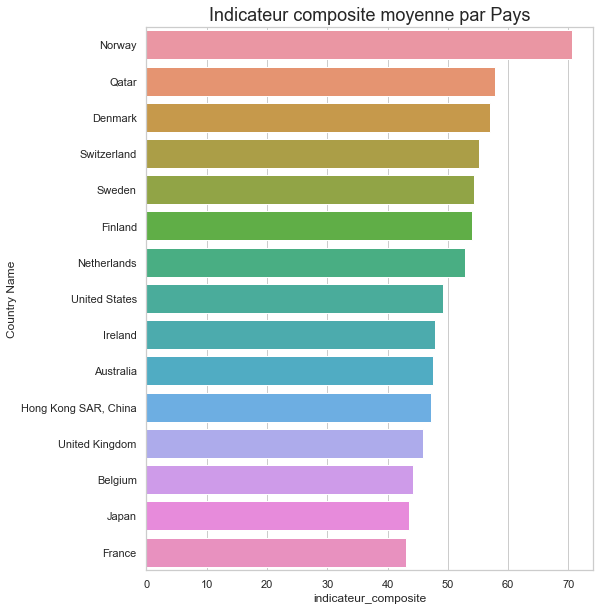

In [97]:
sb.set(style="whitegrid")
plt.figure(figsize=(8, 10))
plt.title('Indicateur composite moyenne par Pays', size=18)
plot = sb.barplot(y = df_indicateur_pays.iloc[:15]['Country Name'], 
                  x =  df_indicateur_pays.iloc[:15]['indicateur_composite'])
plt.show()

> Cette liste pays represente les 15 premiers pays avec un fort potentiel de clients pour la start-up de la EdTech

### Quelle sera l’évolution de ce potentiel de clients pour chacun de ces pays ?

> Afin d'identifier l'évolution du potentiel des pays, nous tracerons la courbe de l'évolution des l'indicateur composite de chaque pays en fonction des années.

> Nous prendrons 30 pays pour identifier leur évolutions entre les 2001 et 2014

In [98]:
df_pays =df_indicator_pivot_red[['Country Name','Year','indicateur_composite']]

In [99]:
liste_pays = df_indicateur_pays.iloc[:50]['Country Name']

In [100]:
liste_pays

95                   Norway
106                   Qatar
34                  Denmark
124             Switzerland
123                  Sweden
41                  Finland
90              Netherlands
136           United States
57                  Ireland
6                 Australia
51     Hong Kong SAR, China
135          United Kingdom
10                  Belgium
61                    Japan
42                   France
91              New Zealand
66              Korea, Rep.
120                   Spain
116                Slovenia
21                   Canada
44                  Germany
67                   Kuwait
59                    Italy
58                   Israel
114               Singapore
33           Czech Republic
46                   Greece
70                   Latvia
112                  Serbia
115         Slovak Republic
75                Lithuania
4                 Argentina
52                  Hungary
104                Portugal
32                     Cuba
103                 

In [101]:
df_pays=df_pays.loc[df_pays['Country Name'].isin(liste_pays)]

In [102]:
df_pays

Indicator Name,Country Name,Year,indicateur_composite
120,Argentina,2000,43.438969
121,Argentina,2001,22.829764
122,Argentina,2002,21.972746
123,Argentina,2003,22.914849
124,Argentina,2004,24.102661
...,...,...,...
3536,West Bank and Gaza,2010,28.146747
3537,West Bank and Gaza,2011,28.947836
3538,West Bank and Gaza,2012,29.465531
3539,West Bank and Gaza,2013,29.481749


> les 10 premiers pays

In [103]:
liste_10_pays = df_indicateur_pays.iloc[:10]['Country Name']

In [104]:
liste_10_pays

95            Norway
106            Qatar
34           Denmark
124      Switzerland
123           Sweden
41           Finland
90       Netherlands
136    United States
57           Ireland
6          Australia
Name: Country Name, dtype: object

In [105]:
df_10_pays=df_pays.loc[df_pays['Country Name'].isin(liste_10_pays)]

In [106]:
df_10_pays

Indicator Name,Country Name,Year,indicateur_composite
165,Australia,2000,62.124865
166,Australia,2001,30.057945
167,Australia,2002,18.155330
168,Australia,2003,19.167067
169,Australia,2004,21.693827
...,...,...,...
3416,United States,2010,86.006821
3417,United States,2011,50.239687
3418,United States,2012,51.947586
3419,United States,2013,63.587318


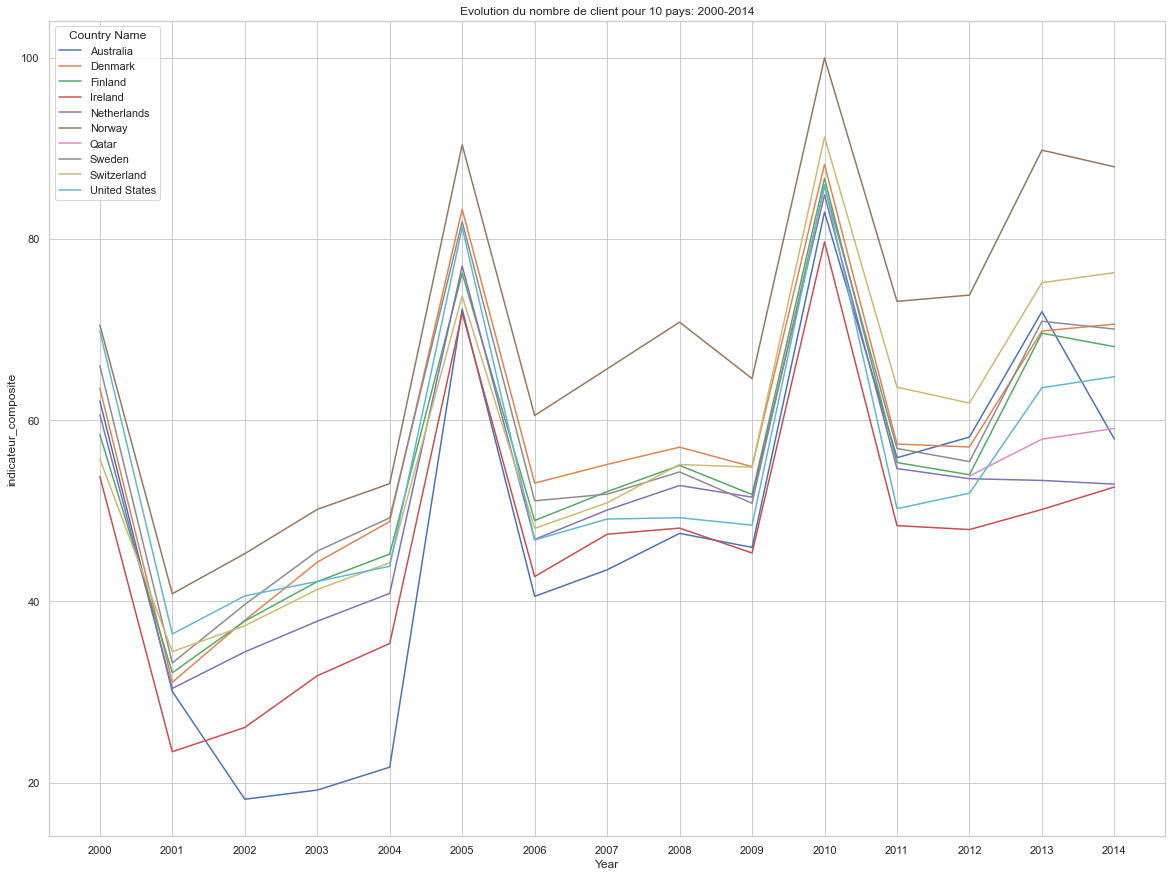

In [107]:
plt.figure(figsize = (20,15))

plt.title('Evolution du nombre de client pour 10 pays: 2000-2014')

sb.lineplot(data= df_10_pays, x="Year", y="indicateur_composite", hue="Country Name" )

plt.show()

In [108]:
liste_10_20pays = df_indicateur_pays.iloc[10:20]['Country Name']

In [109]:
liste_10_20pays

51     Hong Kong SAR, China
135          United Kingdom
10                  Belgium
61                    Japan
42                   France
91              New Zealand
66              Korea, Rep.
120                   Spain
116                Slovenia
21                   Canada
Name: Country Name, dtype: object

In [110]:
df_10_20pays=df_pays.loc[df_pays['Country Name'].isin(liste_10_20pays)]

In [111]:
df_10_20pays

Indicator Name,Country Name,Year,indicateur_composite
285,Belgium,2000,58.155416
286,Belgium,2001,24.883995
287,Belgium,2002,29.560755
288,Belgium,2003,32.820413
289,Belgium,2004,35.896447
...,...,...,...
3401,United Kingdom,2010,77.245339
3402,United Kingdom,2011,45.842262
3403,United Kingdom,2012,46.553679
3404,United Kingdom,2013,61.815818


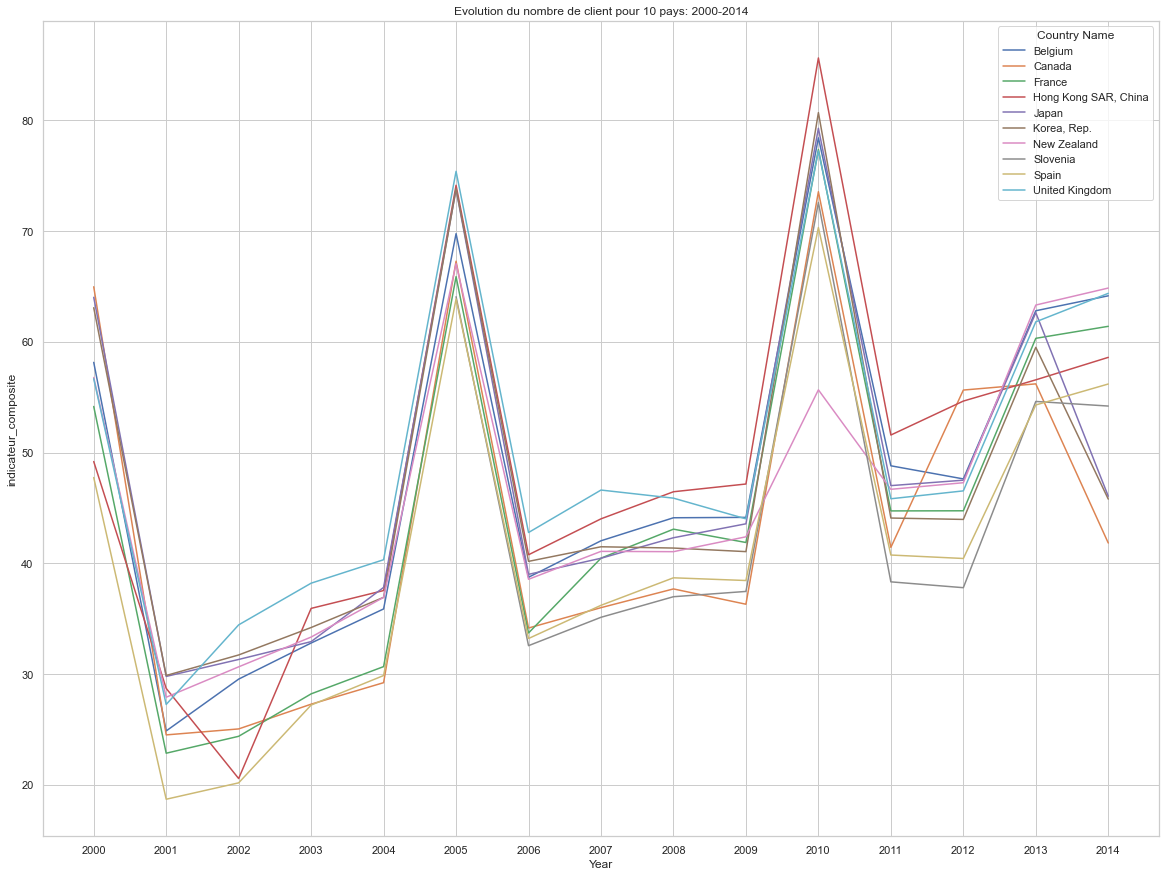

In [112]:
plt.figure(figsize = (20,15))

plt.title('Evolution du nombre de client pour 10 pays: 2000-2014')

sb.lineplot(data= df_10_20pays, x="Year", y="indicateur_composite", hue="Country Name" )

plt.show()

> les 10 derniers pays

In [113]:
liste_20_30pays = df_indicateur_pays.iloc[20:30]['Country Name']

In [114]:
liste_20_30pays

44             Germany
67              Kuwait
59               Italy
58              Israel
114          Singapore
33      Czech Republic
46              Greece
70              Latvia
112             Serbia
115    Slovak Republic
Name: Country Name, dtype: object

In [115]:
df_20_30pays=df_pays.loc[df_pays['Country Name'].isin(liste_20_30pays)]

In [116]:
df_20_30pays

Indicator Name,Country Name,Year,indicateur_composite
782,Czech Republic,2000,42.378316
783,Czech Republic,2001,10.380790
784,Czech Republic,2002,13.878068
785,Czech Republic,2003,17.530011
786,Czech Republic,2004,19.497036
...,...,...,...
2863,Slovak Republic,2010,68.213943
2864,Slovak Republic,2011,33.541332
2865,Slovak Republic,2012,33.759351
2866,Slovak Republic,2013,34.197142


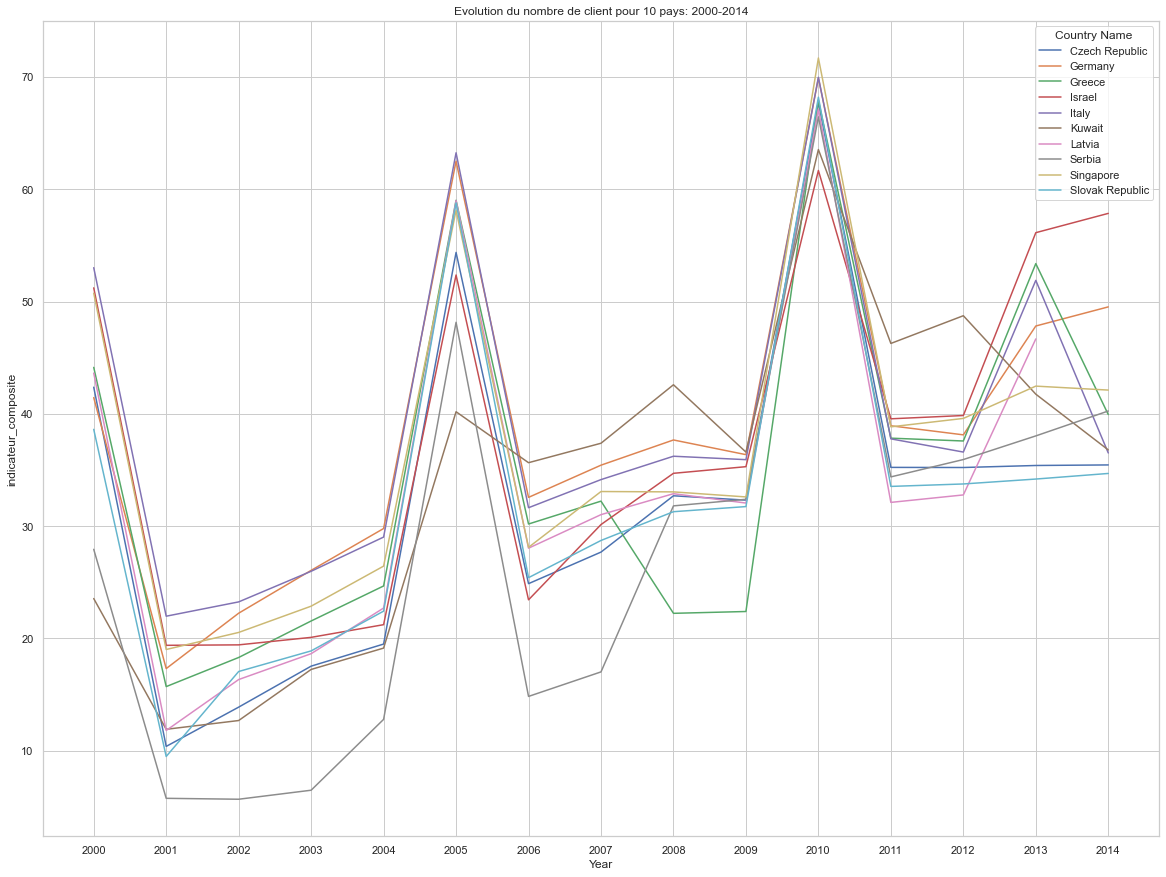

In [117]:
plt.figure(figsize = (20,15))

plt.title('Evolution du nombre de client pour 10 pays: 2000-2014')

sb.lineplot(data= df_20_30pays, x="Year", y="indicateur_composite", hue="Country Name" )

plt.show()

> Nous remarquons que pour tous les pays l'evolution du potentiel client varie considerablement avec de forte périodes de pic et des périodes basses..

> Les périodes de pic se retrouvent pratiquement dans la même période entre 2004-2006 et entre 2009-2011.

### Dans quels pays l'entreprise doit-elle opérer en priorité ?

> 1) Suisse

> 2) Norvège

> 3) Denmark

> 4) New Zeland

> 5) Grande Brétagne

> 6) Israél

> 7) Allemange

> Ces pays sont une priorité car leur indicateur composite est en pleine croissance à partir 2014

## 6) Conclusion

In [118]:
# Connaissances acquises

> Analyse des données

    Ce projet m'a permis d'avoir une bonne idée du métier de Data Analyst.
    Comment nettoyer les jeux de données, les traiter et les interpréter
    
> L'utilisation de pyhton

    J'ai pu me familiariser avec le logiciel Pyhton.
    aborder et utiliser ses librairies (Pandans, Numpy, Matplotlib, Seaborn et Sklearn)
    Certes Il me reste beaucoup de travail à faire pour en revendiquer une maitrise mais cette première étape fut très riche et intense pour moi.